In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

# Exploring the Dataset

In [3]:
df = pd.read_csv(r"D:\ibrahim\data analyst\5. Python\movies.csv")
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [5]:
df.shape

(7668, 15)

In [6]:
df.describe()

,year,score,votes,budget,gross,runtime
count,7668.000000,7665.000000,7.665000e+03,5.497000e+03,7.479000e+03,7664.000000
mean,2000.405451,6.390411,8.810850e+04,3.558988e+07,7.850054e+07,107.261613
std,11.153508,0.968842,1.633238e+05,4.145730e+07,1.657251e+08,18.581247
min,1980.000000,1.900000,7.000000e+00,3.000000e+03,3.090000e+02,55.000000
25%,1991.000000,5.800000,9.100000e+03,1.000000e+07,4.532056e+06,95.000000
50%,2000.000000,6.500000,3.300000e+04,2.050000e+07,2.020576e+07,104.000000
75%,2010.000000,7.100000,9.300000e+04,4.500000e+07,7.601669e+07,116.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,366.000000


In [7]:
df.isnull().sum()


name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [8]:
# top 5 grossing movies
df.sort_values(by=['gross'], ascending=False).head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0


# Data Cleaning & Preprocessing

In [10]:
# Check for missing data in each variable
print("Number of missing values per variable:\n")
print(df.isnull().sum().sort_values(ascending=False))

print("="*100)

# How many observations have at least one missing value?
missing_obs = df.isnull().any(axis=1).sum() # per row
missing_ratio = (missing_obs / df.shape[0]) * 100

print(f"Observations with at least one missing value: {missing_obs} rows")
print(f"This represents approximately {missing_ratio:.2f}% of the dataset")

# Drop rows with missing data
df.dropna(inplace=True)
print("Missing data rows have been dropped.")

Number of missing values per variable:

budget      2171
gross        189
rating        77
company       17
runtime        4
score          3
votes          3
writer         3
country        3
released       2
star           1
name           0
genre          0
year           0
director       0
dtype: int64
Observations with at least one missing value: 2247 rows
This represents approximately 29.30% of the dataset
Missing data rows have been dropped.


In [11]:
print(df.isnull().sum())

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64


In [12]:
# duplicate rows
df.duplicated().sum()

0

In [13]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [14]:
df['budget']= df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')

In [15]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


In [16]:
df['genre'].value_counts()

genre
Comedy       1496
Action       1415
Drama         863
Crime         399
Adventure     327
Biography     311
Animation     277
Horror        251
Fantasy        41
Mystery        17
Thriller        7
Sci-Fi          6
Romance         5
Family          4
Western         2
Name: count, dtype: int64

# Correlation

In [18]:
corr = df.corr(numeric_only=True)

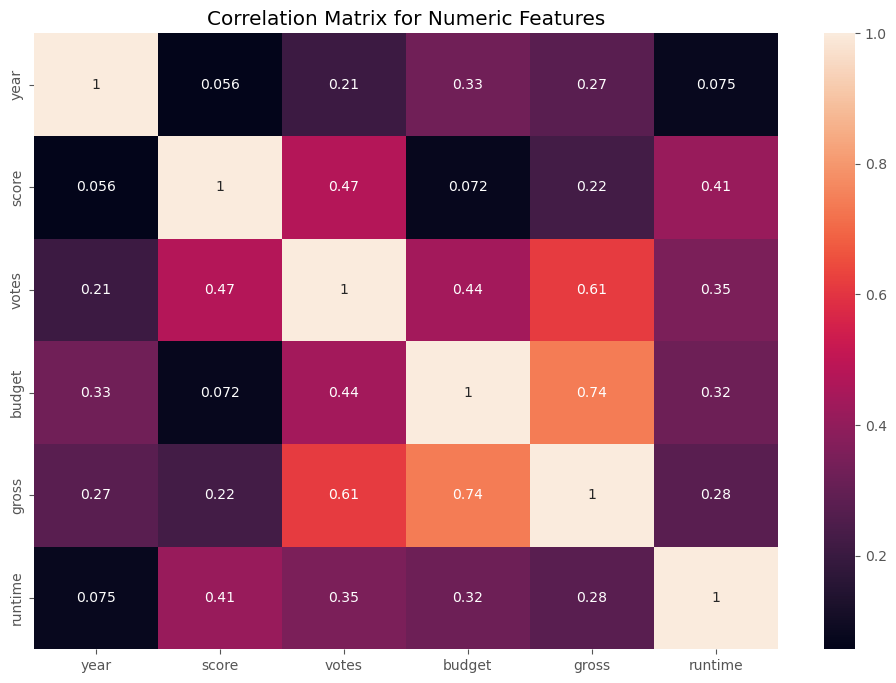

In [19]:
sns.heatmap(corr, annot=True)
plt.title('Correlation Matrix for Numeric Features')
plt.show()

In [51]:
# Visualize all pairwise correlations in a stacked format
sorted_pairs = corr.stack()
sorted_pairs

year     year       1.000000
         score      0.056386
         votes      0.206021
         budget     0.327722
         gross      0.274321
         runtime    0.075077
score    year       0.056386
         score      1.000000
         votes      0.474256
         budget     0.072001
         gross      0.222556
         runtime    0.414068
votes    year       0.206021
         score      0.474256
         votes      1.000000
         budget     0.439675
         gross      0.614751
         runtime    0.352303
budget   year       0.327722
         score      0.072001
         votes      0.439675
         budget     1.000000
         gross      0.740247
         runtime    0.318695
gross    year       0.274321
         score      0.222556
         votes      0.614751
         budget     0.740247
         gross      1.000000
         runtime    0.275796
runtime  year       0.075077
         score      0.414068
         votes      0.352303
         budget     0.318695
         gross

In [57]:
# Filter and view only strong correlations (absolute value > 0.5, exclude self-correlation)
strong_pairs = sorted_pairs[(abs(sorted_pairs) > 0.5) & (sorted_pairs < 1.0)].drop_duplicates()
strong_pairs

votes   gross    0.614751
budget  gross    0.740247
dtype: float64

## Correlation for all columns

In [21]:
#converting all objects to category thne assigning to their no's, no order significance
df_numerized = df.copy()
for col in df_numerized.columns:
    if (df_numerized[col].dtype == 'object'):
        df_numerized[col] = df_numerized[col].astype('category')
        df_numerized[col] = df_numerized[col].cat.codes
df_numerized        

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,4692,6,6,1980,1304,8.4,927000.0,1795,2832,699,46,19000000,46998772,1426,146.0
1,3929,6,1,1980,1127,5.8,65000.0,1578,1158,214,47,4500000,58853106,452,104.0
2,3641,4,0,1980,1359,8.7,1200000.0,757,1818,1157,47,18000000,538375067,945,124.0
3,204,4,4,1980,1127,7.7,221000.0,889,1413,1474,47,3500000,83453539,1108,88.0
4,732,6,4,1980,1170,7.3,108000.0,719,351,271,47,6000000,39846344,1083,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,415,6,0,2020,904,6.6,140000.0,16,2390,1812,47,90000000,426505244,452,124.0
7649,3556,4,0,2020,713,6.5,102000.0,852,2309,147,47,85000000,319715683,1108,99.0
7650,1153,4,1,2020,904,5.6,53000.0,1809,2827,1470,47,175000000,245487753,1397,101.0
7651,3978,4,1,2020,758,6.8,42000.0,294,2091,640,6,135000000,111105497,12,100.0


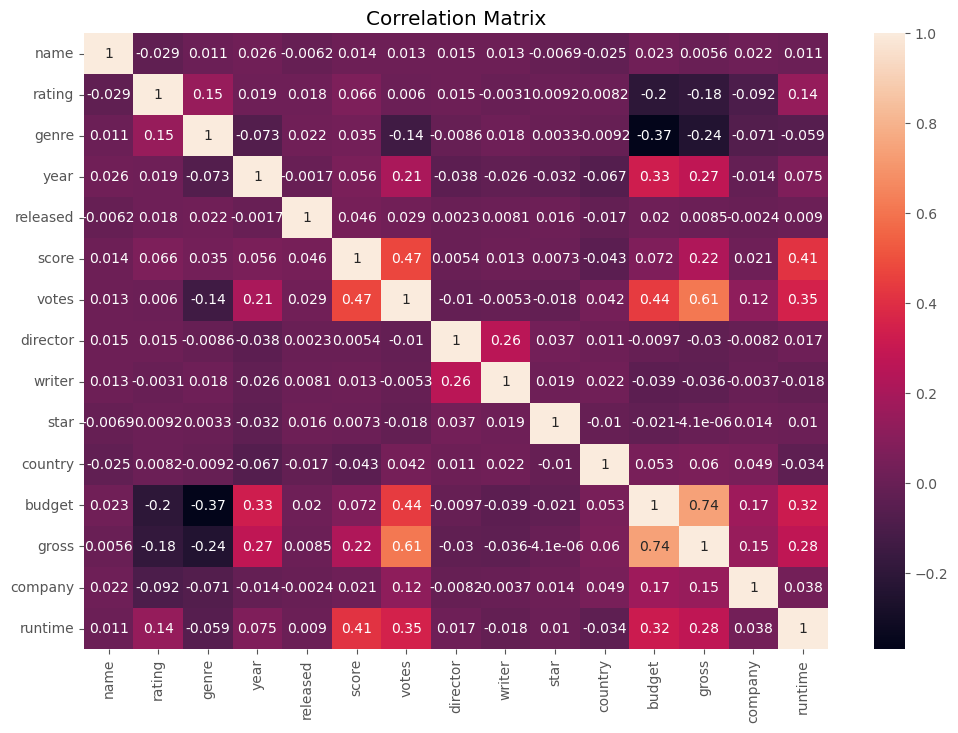

In [22]:
corr_df_numerized = df_numerized .corr()
sns.heatmap(corr_df_numerized, annot=True)
plt.title('Correlation Matrix')
plt.show()

In [23]:
sorted_pairs= corr_df_numerized.stack()
sorted_pairs

name     name        1.000000
         rating     -0.029234
         genre       0.010996
         year        0.025542
         released   -0.006152
                       ...   
runtime  country    -0.034477
         budget      0.318695
         gross       0.275796
         company     0.037585
         runtime     1.000000
Length: 225, dtype: float64

In [24]:
strong_pairs = sorted_pairs[(abs(sorted_pairs) > 0.5) & (sorted_pairs < 1.0)].drop_duplicates()
strong_pairs

votes   gross    0.614751
budget  gross    0.740247
dtype: float64

## Scatter Plot: budget vs Gross Revenue

<Axes: xlabel='budget', ylabel='gross'>

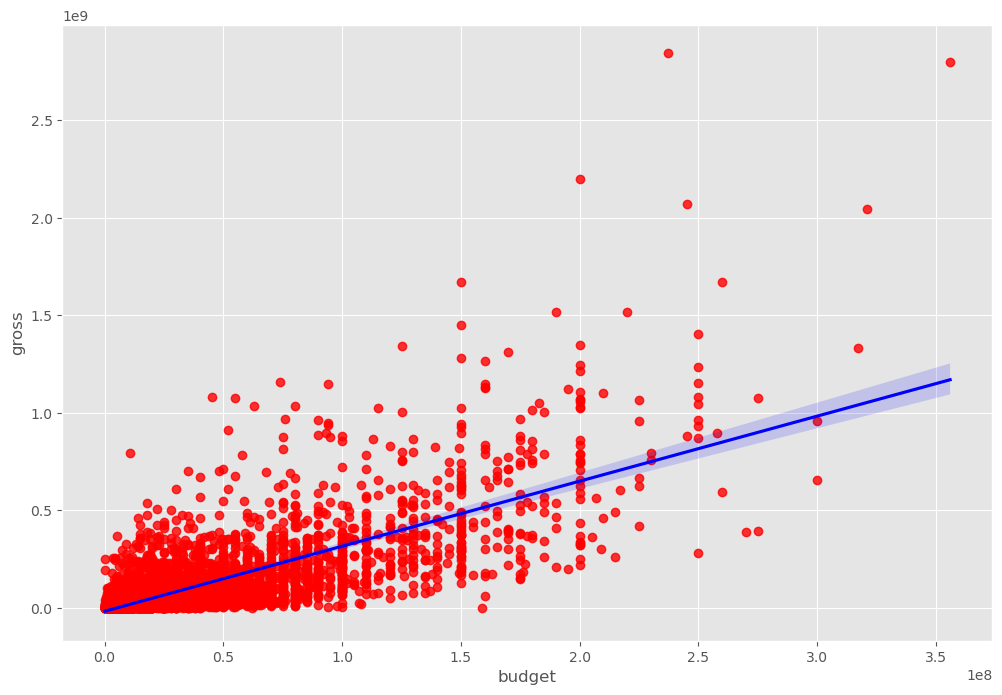

In [27]:
sns.regplot(x='budget', y='gross',data=df, scatter_kws={'color':'red'},line_kws={'color':'blue'})

## Scatter Plot: Votes vs Gross Revenue

<Axes: xlabel='votes', ylabel='gross'>

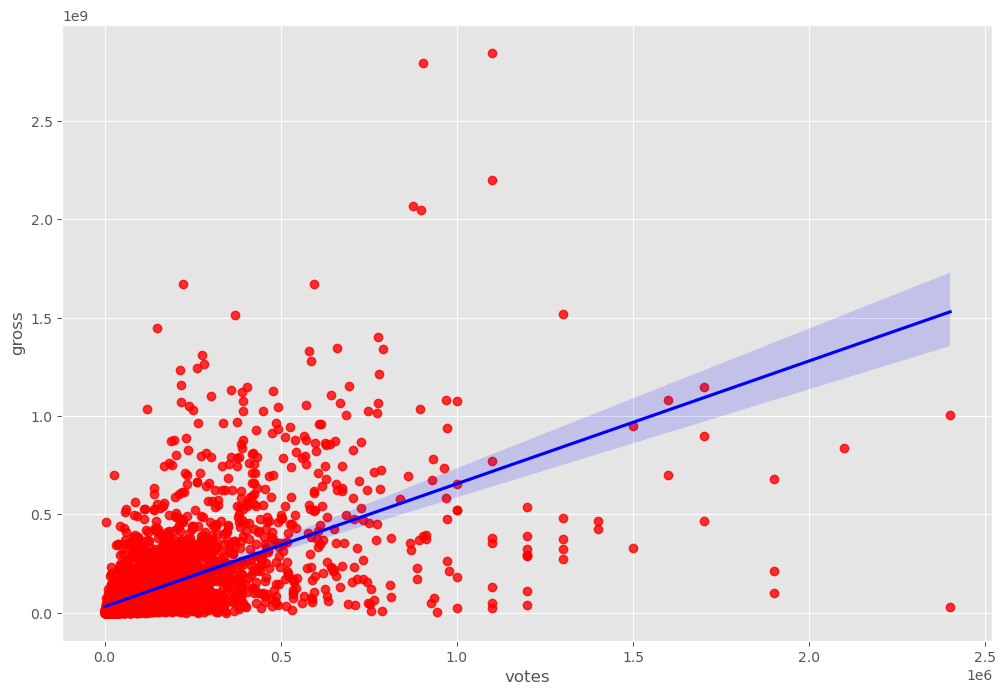

In [59]:
sns.regplot(x='votes', y='gross',data=df, scatter_kws={'color':'red'},line_kws={'color':'blue'})

# Asking Questions and Finding Answers

## What are the 5 most talked-about movies of all time?

In [95]:
top_voted_movies = df[['name','votes']].sort_values('votes', ascending=False).reset_index(drop=True).head(5)
top_voted_movies.index = top_voted_movies.index +1
top_voted_movies

,name,votes
1,The Dark Knight,2400000.0
2,The Shawshank Redemption,2400000.0
3,Inception,2100000.0
4,Forrest Gump,1900000.0
5,Fight Club,1900000.0


## Top Earning Companies by Total Gross

In [146]:
total_gross_per_company = df.groupby('company', as_index=False)['gross'].sum()
sorted_companies = total_gross_per_company.sort_values(by='gross', ascending=False).head(10)

sorted_companies.reset_index(drop=True,inplace=True)

sorted_companies

,company,gross
0,Warner Bros.,54610959970
1,Universal Pictures,51241105418
2,Columbia Pictures,42356430218
3,Paramount Pictures,40021704691
4,Twentieth Century Fox,39542573303
5,Walt Disney Pictures,35833650748
6,New Line Cinema,19612851164
7,Marvel Studios,15065592411
8,DreamWorks Animation,11873612858
9,Dreamworks Pictures,11593807697


## Most Profitable Companies by Average Movie Revenue

In [167]:
avg_gross_per_company = df.groupby('company', as_index=False)['gross'].mean()
sorted_companies = avg_gross_per_company.sort_values(by='gross', ascending=False).head(5)

sorted_companies.reset_index(drop=True,inplace=True)

sorted_companies

,company,gross
0,Marvel Studios,1.255466e+09
1,Illumination Entertainment,1.097122e+09
2,Fairview Entertainment,9.665549e+08
3,B24,8.806815e+08
4,Avi Arad Productions,8.560852e+08


## Highest-scored movies

In [165]:
highest_scored_movies = df[['name','score']].sort_values(by = 'score', ascending=False)
highest_scored_movies.reset_index(drop=True,inplace=True)
highest_scored_movies.head(10)

,name,score
0,The Shawshank Redemption,9.3
1,The Dark Knight,9.0
2,Schindler's List,8.9
3,Pulp Fiction,8.9
4,The Lord of the Rings: The Return of the King,8.9
5,Inception,8.8
6,Forrest Gump,8.8
7,Fight Club,8.8
8,The Lord of the Rings: The Fellowship of the Ring,8.8
9,The Matrix,8.7
